Consider National Highway Authority of India (NHAI) provides you a real accidental data set of Bangalore highway of India. The size of data set is (83 x 8). Apply suitable Machine Learning technique to address following problems.
1. Forecast Accident type(variable C in the data set) for year 2015 based on the observations given for year 2014 in the data set. Analyse the predictive results achieved.

[Hint:-

* LHS stands for Left-hand sight
* RHS stands for Right-hand side
* Ch. stands for Chainage which is an imaginary line used to measure distance, often corresponding to the centre of a straight road.
* KM/km/KMS is kilometres
* ROW - Right of Way - the legal right, established by usage or grant, to pass along a specific route through grounds or property belonging to another, for example, to remove obstructions to make roads
* MCW means the main carriageway

Also, 103+123 km means 103 km and 123 metres, or 103.123 metres.
Please note for solving & understanding convenience, either convert "+" values into "." format . Check that the entire column values in the same format ]

2. Use feature Location in the data set to identify the prone area of major accidents.
3. Identify top 5 important features for variable Accident type(variable C in the data set)

## Content

* [1. Loading Data And Overview](#data_loading)
* [2. Data Preprocessing](#data_preprocessing)
* [2.1. Accident Date Time](#acc_datetime)
* [2.2 Accident Location](#acc_location)
* [2.3 Accident Causes](#acc_causes)
* [2.4 Help Provided By Ambulance Patrol](#acc_help)
* [2.5 Classification of Accident](#acc_classification)
* [2.6 Rearanging Columns](#col_rearange)

In [20]:
## Load all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
sns.set_style('darkgrid')

<a id='data_loading'></a>
## 1. Loading Data And Overview

In [3]:
## Load the data
accident_data = pd.read_csv('NHAIAccidentData.csv')
accident_data.head()

,Date,TimeOfAcc,AccLocation,NatureAccident,ClassificationOfAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,VehicleResponsible,Fatal,Grevious,Minor,Injured,NumAnimalsKilled,HelpProvidedByAmbulancePatrol,Remarks
0,9/6/2015,09:00 AM,Ch. 69+5006,2,2,2,2,1,9,1,One Diesel Truck collapsed,0,2,1,0,0,Petrol Vehicle,NaN
1,9/5/2014,07:18 AM,72+500,7,1,2,2,3,9,1,Lorry & Scorpio,2,0,0,0,0,Ambulance,NaN
2,9/10/2014,08:50 AM,20+250 LHS,4,-,3,3,1,9,1,LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477),0,0,0,0,0,Petrol Vehicle,NO PROPERTY DAMAGES. INFORMED KEY PERSONS.
3,8/9/2015,05:00 AM,NaN,1,2,2,1,3,9,1,Lorry Truck,0,1,1,0,0,Petrol Vehicle,NaN
4,8/4/2015,08:23 AM,126.800 KM RHS,2,2,2,4,4,9,1,Car,0,2,1,1,0,Petrol Vehicle,A car upside due to over speed


In [4]:
accident_data.shape

(91, 18)

In this dataset 91 accident records present.Some Missing data are present in the set. We need to process those data before applying a learning algorithm.

## 2. Data Preprocessing

<a id='acc_datetime'></a>
### 2.1 Accident Date Time

In [5]:
# Concatenating date and time column
accident_data['Acc_datetime'] = accident_data['Date'].values + ' ' +  accident_data['TimeOfAcc'].values
cols = accident_data.columns.to_list()
cols = cols[-1:] + cols[:-1]
accident_data = accident_data[cols]
## Drop the Date and TimeOfAcc columns
accident_data.drop(['Date', 'TimeOfAcc'], axis=1, inplace=True)
accident_data.head()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Acc_datetime,AccLocation,NatureAccident,ClassificationOfAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,VehicleResponsible,Fatal,Grevious,Minor,Injured,NumAnimalsKilled,HelpProvidedByAmbulancePatrol,Remarks
0,9/6/2015 09:00 AM,Ch. 69+5006,2,2,2,2,1,9,1,One Diesel Truck collapsed,0,2,1,0,0,Petrol Vehicle,NaN
1,9/5/2014 07:18 AM,72+500,7,1,2,2,3,9,1,Lorry & Scorpio,2,0,0,0,0,Ambulance,NaN
2,9/10/2014 08:50 AM,20+250 LHS,4,-,3,3,1,9,1,LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477),0,0,0,0,0,Petrol Vehicle,NO PROPERTY DAMAGES. INFORMED KEY PERSONS.
3,8/9/2015 05:00 AM,NaN,1,2,2,1,3,9,1,Lorry Truck,0,1,1,0,0,Petrol Vehicle,NaN
4,8/4/2015 08:23 AM,126.800 KM RHS,2,2,2,4,4,9,1,Car,0,2,1,1,0,Petrol Vehicle,A car upside due to over speed


(array([40.,  0., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([2014. , 2014.4, 2014.8, 2015.2, 2015.6, 2016. , 2016.4, 2016.8,
        2017.2, 2017.6, 2018. ]),
 <a list of 10 Patch objects>)

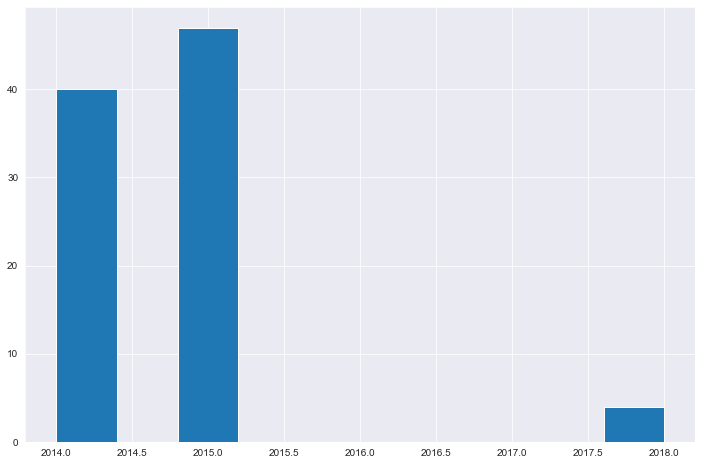

In [7]:
datetime = pd.to_datetime(accident_data['Acc_datetime'].values)
plt.figure(figsize=(12,8))
plt.tight_layout
plt.hist(datetime.year)

More accicent occure in the year 2015. Less accident happen in the year 2017 to 2018

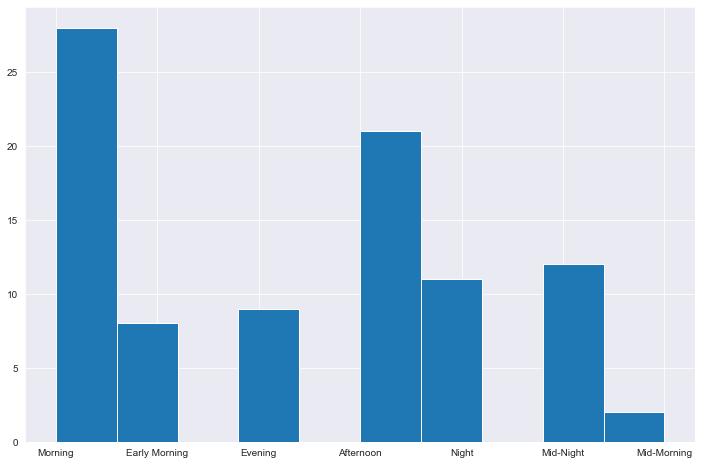

In [9]:
def day_time_labeler(timeVal):
    if timeVal <= 4:
        return 'Mid-Night'
    elif timeVal > 4 and timeVal <= 6:
        return 'Early Morning'
    elif timeVal > 6 and timeVal <= 9:
        return 'Morning'
    elif timeVal > 9 and timeVal <= 12:
        return 'Mid-Morning'
    elif timeVal > 12 and timeVal <= 16:
        return 'Afternoon'
    elif timeVal > 16 and timeVal <= 20:
        return 'Evening'
    elif timeVal > 20 and timeVal <= 23:
        return 'Night'

# Acc_daytime column added by specifying a hour threshold
accident_data['Acc_daytime'] = datetime.hour
accident_data['Acc_daytime'] = accident_data['Acc_daytime'].apply(lambda x: day_time_labeler(x))
plt.figure(figsize=(12,8))
plt.tight_layout
accident_data['Acc_daytime'].hist()

Most of the accidents occure between 8:00 AM and 9:00 AM in the morning. But Acc_daytime is a categorical column so we need convert it into numerical column.

In [23]:
le_daytime = LabelEncoder()
accident_data['Acc_daytime'] = le_daytime.fit_transform(accident_data['Acc_daytime'].values)

<a id='acc_location'></a>
### 2.2 Accident Location

In [10]:
# This function extract speed factor from the AccLocation Column
def speed_extractor(StrText):
    result = 0.000
    try:
        if len(StrText) > 0:
            val = re.findall('\d{1,15}.\d{1,3}', StrText)
            result = float(val[0]) if len(val) > 0 else 0
    except ValueError:
        result = 0.000
    return result

accident_data['AccLocation_temp'] = accident_data['AccLocation'].fillna('Unknown')
# Replace all + with .
accident_data['AccLocation_temp'].replace('\+', '.', regex=True, inplace=True)
accident_data['Acc_speed'] = accident_data['AccLocation_temp'].apply(lambda x: speed_extractor(x))
accident_data.drop(['AccLocation_temp'], axis=1, inplace=True)
accident_data['Acc_speed'].values

array([ 69.5  ,  72.5  ,  20.25 ,   0.   , 126.8  , 126.8  , 126.8  ,
       160.11 , 115.6  , 115.6  ,  84.3  ,  26.2  , 172.2  ,  18.7  ,
        80.   , 162.8  , 162.8  ,  96.1  ,  91.8  , 135.025,  60.2  ,
       164.85 ,  14.835,  27.8  ,  92.   , 126.8  , 126.8  ,  24.65 ,
         0.   , 117.5  , 109.   , 109.   , 109.   ,  16.7  ,  24.675,
        19.35 ,   0.   ,   0.   , 149.2  , 180.9  , 173.2  , 131.6  ,
       132.6  , 122.05 , 117.   ,   0.   , 157.8  , 128.   ,  90.25 ,
       157.4  ,  20.7  ,  91.8  , 162.8  , 138.25 , 138.25 , 121.7  ,
        18.8  ,  23.   ,  18.8  , 132.7  , 104.5  , 148.2  ,  18.7  ,
       126.9  ,  89.5  , 125.   ,  17.15 ,  14.55 ,  86.   ,  86.   ,
       164.2  ,  85.4  ,  13.5  , 162.05 , 147.7  , 147.7  , 122.1  ,
       153.9  , 112.6  , 142.3  ,  86.   ,  26.   ,  24.75 ,  24.1  ,
        86.   , 133.   ,  21.8  , 150.   , 148.9  ,  12.5  ,  24.5  ])

In [15]:
locCounter = Counter(accident_data['AccLocation'].values)
print("Most Accident pron areas are:")
for loc in locCounter.most_common(2):
    print("\n%s"%loc[0])

Most Accident pron areas are:

126.800 KM RHS

109.000 KM RHS


<a id='acc_causes'></a>
### 2.3 Accident Cause

In [16]:
accident_data['Causes'].unique()

array(['2', '3', '1', '4', '5', '-', '7'], dtype=object)

As we can see there are some missig data present so we can replace the value of that with 6

In [19]:
accident_data['Causes'] = accident_data['Causes'].apply(lambda x: int(x) if str.isnumeric(x) else 6)
accident_data['Causes'].unique()

array([2, 3, 1, 4, 5, 6, 7], dtype=int64)

<a id='acc_help'></a>
### 2.4 Help Provided By Ambulance Patrol

In [21]:
accident_data['HelpProvidedByAmbulancePatrol'].unique()

array(['Petrol Vehicle', 'Ambulance', 'Ambulance/Petrol Vehicle'],
      dtype=object)

In [22]:
# We need to convert this categorical columns to numerical column so that we can easily train our algorithm
le = LabelEncoder()
accident_data['HelpProvidedByAmbulancePatrol'] = le.fit_transform(accident_data['HelpProvidedByAmbulancePatrol'].values)
accident_data['HelpProvidedByAmbulancePatrol'].values

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2,
       2, 1, 1])

<a id='acc_classification'></a>
### 2.5 Classification of Accident

In [27]:
accident_data['ClassificationOfAccident'].unique()

array(['2', '1', '-', '3', '4'], dtype=object)

We sholud replace the '-' value with some numerical value I'm replacing it with 5

In [28]:
accident_data['ClassificationOfAccident'] = accident_data['ClassificationOfAccident'].apply(lambda x: int(x) if str.isnumeric(x) else 5)

<a id='col_rearange'></a>
### 2.6 Rearanging Columns 

In [29]:
cols = ['Acc_datetime', 'NatureAccident', 'Causes', 'RoadFeature', 'RoadCondition','IntersectionTypeControl', 
        'WeatherCondition', 'Fatal', 'Grevious', 'Minor', 'Injured', 'NumAnimalsKilled','HelpProvidedByAmbulancePatrol', 
        'Acc_daytime', 'Acc_speed', 'AccLocation', 'Remarks','VehicleResponsible','ClassificationOfAccident']
accident_data = accident_data[cols]
accident_data.head()

,Acc_datetime,NatureAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,Fatal,Grevious,Minor,Injured,NumAnimalsKilled,HelpProvidedByAmbulancePatrol,Acc_daytime,Acc_speed,AccLocation,Remarks,VehicleResponsible,ClassificationOfAccident
0,9/6/2015 09:00 AM,2,2,2,1,9,1,0,2,1,0,0,2,5,69.50,Ch. 69+5006,NaN,One Diesel Truck collapsed,2
1,9/5/2014 07:18 AM,7,2,2,3,9,1,2,0,0,0,0,0,5,72.50,72+500,NaN,Lorry & Scorpio,1
2,9/10/2014 08:50 AM,4,3,3,1,9,1,0,0,0,0,0,2,5,20.25,20+250 LHS,NO PROPERTY DAMAGES. INFORMED KEY PERSONS.,LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477),5
3,8/9/2015 05:00 AM,1,2,1,3,9,1,0,1,1,0,0,2,1,0.00,NaN,NaN,Lorry Truck,2
4,8/4/2015 08:23 AM,2,2,4,4,9,1,0,2,1,1,0,2,5,126.80,126.800 KM RHS,A car upside due to over speed,Car,2
